In [25]:
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [26]:
wines = pd.read_csv('winemag-data_first150k.csv')
del wines['Unnamed: 0']
wines.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [27]:
numeric_columns = wines.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns: ", *numeric_columns)

Numeric columns:  points price


In [28]:
categorical_columns = wines.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", *categorical_columns)

Categorical columns:  country description designation province region_1 region_2 variety winery


In [29]:
wines['price_for_point'] = wines['price'] / wines['points']
wines.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,price_for_point
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,2.447917
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,1.145833
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,0.937500
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,0.677083
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,0.694737


In [30]:
country_counts = wines['country'].value_counts()
print(country_counts)

country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


In [31]:
overall_mean_price = wines['price'].mean()

random_lines = wines.sample(n=100, random_state=1)
random_mean_price = random_lines['price'].mean()

print(f"Random_mean_price = {random_mean_price} : Overall_mean_price = {overall_mean_price}")

Random_mean_price = 39.43333333333333 : Overall_mean_price = 33.13148249353299


In [32]:
numeric_columns = wines.select_dtypes(include=['int64', 'float64']).columns.tolist()

descriptive_statistics = pd.DataFrame(index=("Mean", "Median", "Mode", "Dispersion", "STD", "Range"))

for col in numeric_columns:
    mean = wines[col].mean()
    median = wines[col].median()
    mode = wines[col].mode()[0]
    dispersion = wines[col].var()
    standard_deviation = wines[col].std()
    dataset_range = wines[col].max() - wines[col].min()

    descriptive_statistics[col] = [mean, median, mode, dispersion, standard_deviation, dataset_range]

print(f"Descriptive statistics\n{descriptive_statistics}")

Descriptive statistics
               points        price  price_for_point
Mean        87.888418    33.131482         0.371145
Median      88.000000    24.000000         0.275862
Mode        87.000000    20.000000         0.229885
Dispersion  10.383809  1319.326636         0.148330
STD          3.222392    36.322536         0.385137
Range       20.000000  2296.000000        23.185812


In [33]:
# Для оценок (points): Среднее значение часто используется, 
# так как оценки обычно имеют ограниченный диапазон и менее подвержены выбросам. 
# Однако медиана также является хорошей мерой, особенно если распределение асимметрично.
# Для цены (price): Медиана является лучшей мерой центральной тенденции, 
# так как цены могут варьироваться в широком диапазоне и иметь выбросы. 
# Среднее значение может быть искажено этими выбросами.

In [34]:
wines['price_zscore'] = (wines['price'] - wines['price'].mean()) / wines['price'].std()

threshold = 3
outliers = wines[np.abs(wines['price_zscore']) > threshold]

print(f"Outliers: {len(outliers)}")
print(outliers[['price', 'price_zscore']])

Outliers: 1677
        price  price_zscore
0       235.0      5.557666
14      185.0      4.181110
16      325.0      8.035466
18      290.0      7.071877
22      220.0      5.144699
...       ...           ...
149174  165.0      3.630488
149176  150.0      3.217521
149187  260.0      6.245944
149240  185.0      4.181110
150562  185.0      4.181110

[1677 rows x 2 columns]


In [35]:
# Значения за пределами трех стандартных отклонений встречаются очень редко, около 0.3% от всех данных. 
# Это делает их потенциальными выбросами.

# Если выбросы являются аномальными и не соответствуют общей тенденции данных, 
# их удаление может улучшить качество анализа. 
# Например, если в наборе данных о винах присутствуют несколько необычайно дорогих вин, 
# которые не представляют типичные цены, их можно исключить.

# Если выбросы представляют реальную и значимую информацию, их следует оставить. 
# Например, если некоторые вина действительно стоят значительно больше из-за своей редкости и качества, 
# эти данные могут быть важны для анализа.

In [36]:
numeric_columns =['points', 'price', 'price_for_point']
correlation_matrix = wines[numeric_columns].corr()
print(correlation_matrix)

                   points     price  price_for_point
points           1.000000  0.459863         0.442818
price            0.459863  1.000000         0.998950
price_for_point  0.442818  0.998950         1.000000


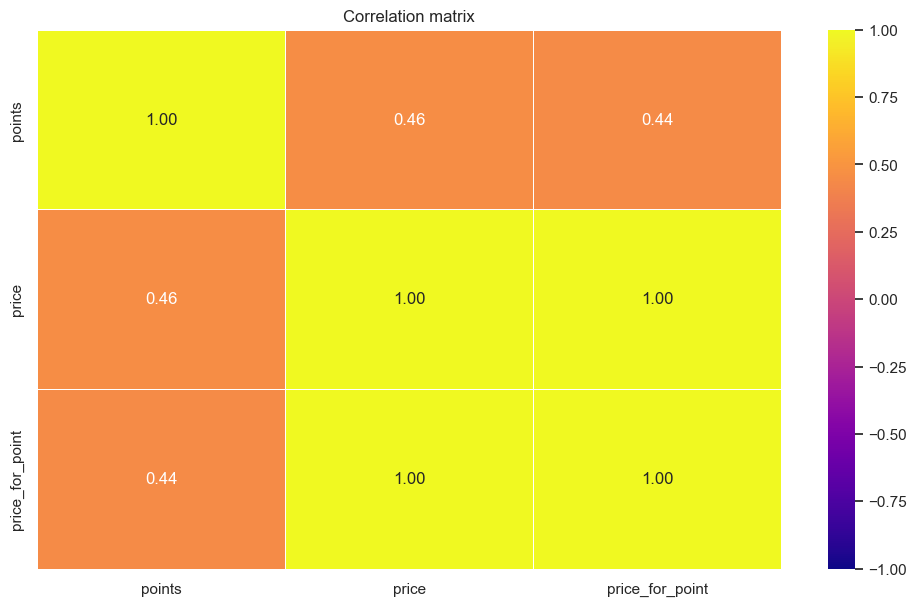

In [37]:
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=.5, center=0, vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

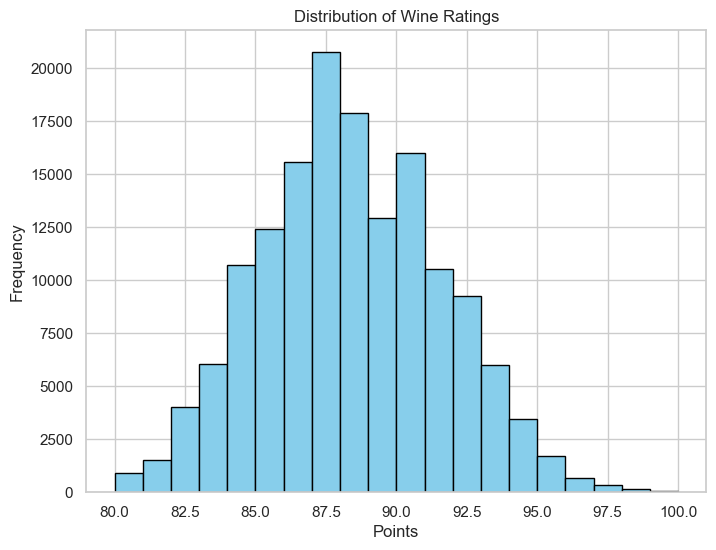

In [38]:
plt.figure(figsize=(8, 6))
plt.hist(wines['points'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Ratings')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

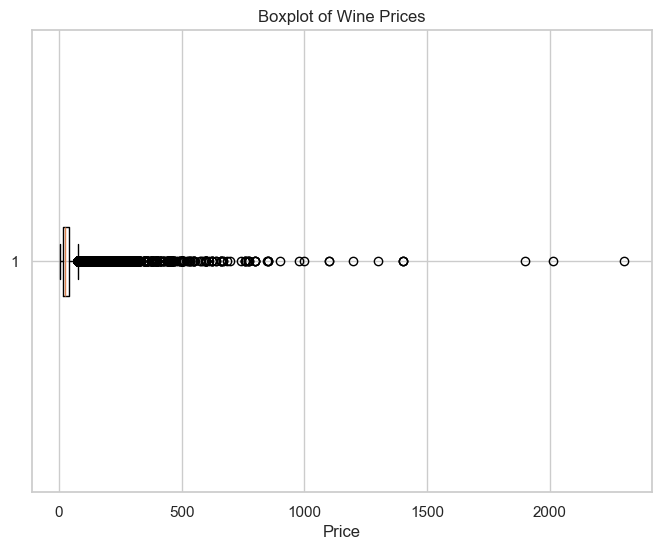

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(wines['price'].dropna(), vert=False)
plt.title('Boxplot of Wine Prices')
plt.xlabel('Price')
plt.grid(True)
plt.show()

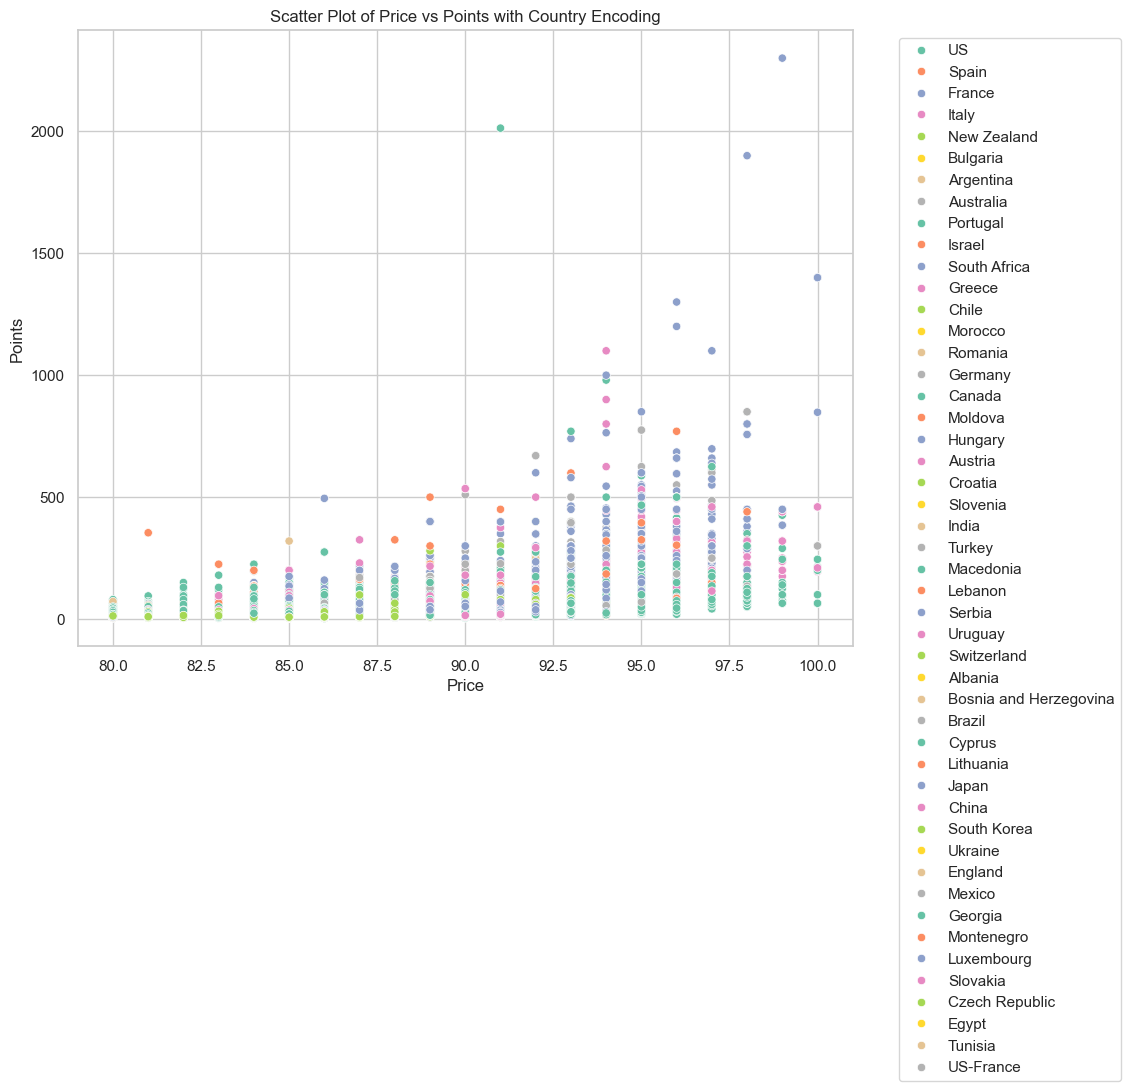

In [40]:
sns.set(style="whitegrid")

# Создание диаграммы рассеяния с цветовой кодировкой по странам
plt.figure(figsize=(10, 8))
sns.scatterplot(y='price', x='points', hue='country', data=wines, palette='Set2')
plt.title('Scatter Plot of Price vs Points with Country Encoding')
plt.xlabel('Price')
plt.ylabel('Points')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [47]:
mean_price = wines['price'].mean()
wines.fillna({'price:': mean_price}, inplace=True)

X = wines[['points']] 
y = wines['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("R² =", r_squared)

R² = 0.21143792607423628


In [42]:
# Это означает, что около 21.14% вариации цены на вино объяснено или 
# предсказано оценками вина с использованием модели линейной регрессии.
    
# Таким образом, модель объясняет только небольшую часть вариации цены на вино на основе оценок.
# Это может быть связано с тем, что цена на вино зависит от множества других факторов, 
# которые не учтены в нашей модели, таких как регион производства, марка, рейтинги критиков и другие.

In [49]:
wines_cleaned = wines.dropna(subset=['country', 'points', 'price'])
wines_cleaned = wines_cleaned.copy()
wines_cleaned.loc[:, 'is_US'] = (wines_cleaned['country'] == 'US').astype(int)
X = wines_cleaned[['points', 'price']]
y = wines_cleaned['is_US']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic regression model accuracy:", accuracy)

Logistic regression model accuracy: 0.5862514493953951
